<a href="https://colab.research.google.com/github/nerr22/movies_sentiment/blob/master/Movie_Script_Sentiment_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import nltk
import re
import string
import nltk
import nltk.sentiment
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('liu_hu_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
sns.set_style('darkgrid')
stopwords=list(set(stopwords.words('english')))


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Error loading liu_hu_lexicon: Package 'liu_hu_lexicon' not
[nltk_data]     found in index


In [0]:
""#create a function that will split the script into a dataframe object based off provided seperator(sep_type)
def split_and_df(split_obj,sep_type):
  if sep_type=='sent':
    obj=split_obj.split('.')
    #create array/dict
    obj_dict=dict(zip(np.asarray(range(0,len(obj))),obj))
    df=pd.DataFrame.from_dict(obj_dict,orient='index').reset_index()
    df.columns=['sent_num','sent']
    return df
  if sep_type=='word':
    split_obj=split_obj.replace('\n',' ')
    obj=split_obj.split(' ')
    #create array/dict
    obj_dict=dict(zip(np.asarray(range(0,len(obj))),obj))
    df=pd.DataFrame.from_dict(obj_dict,orient='index').reset_index()
    df.columns=['word_num','word']
    return df
  if sep_type=='line':
    obj=split_obj.split('\n')
    #create array/dict
    obj_dict=dict(zip(np.asarray(range(0,len(obj))),obj))
    df=pd.DataFrame.from_dict(obj_dict,orient='index').reset_index()
    df.columns=['line_num','line']
    return df
  else:
    return 'Error'


#create a function that will return the sentiment for a string of words using vader
def get_sent(words):
  vader_analyzer = SentimentIntensityAnalyzer()
  try:
    sentence=''.join(words)
    sentiment=vader_analyzer.polarity_scores(sentence)
    return sentiment['compound']
  except:
    pass


#create a function that returns only dialogue (to be used primarily with books)
def get_dialogue(words):
  try:
    new_string=re.search(r'"(.*?)"', words)
    return new_string.group(1)
  except:
    pass


#create a function to remove punctuation from a string of words (words)  
def clean(words):
  try:
    words = words.split()
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    stripped=[x.lower() for x in stripped]
    return stripped[0]
  except:
    pass

#__________End Clean Function_________________________________________________________________________________________________________________



#create a function that opens a provided path and reads it using read()
def open_doc(path):
  doc=path
  doc=open(doc,'r',encoding="utf8", errors='ignore')
  return doc.read()

# Plotting functions___________________________________________________________________________________________________________________________



#function for graphing a line graph of sentiments from a 'get_sent' dataframe
def line_graphs(graph_obj,fig_size=(20,10)):
  print('Sentiment Line Plot')
  plt.figure(figsize=fig_size)
  sns.lineplot(x=graph_obj[graph_obj.columns[0]],y=graph_obj.sent,linewidth=3,color='red')


#function to plot the distribution of sentiment in a corpus on a histogram  
def sent_dist(graph_obj,bins=15,fig_size=(10,10)):
  print('Sentiment Distribution')
  plt.figure(figsize=fig_size)
  sns.distplot(actual_sent.sent,bins=bins,rug=True,color='green')

#function to print the most polarized lines from a corpus  
def poles(obj,sent):
  if sent=='neg':
    neg=obj[obj.sent==(obj.sent.min())]
    return neg
  if sent=='pos':
    pos=obj[obj.sent==(obj.sent.max())]
    return pos
  else:
    


#function to aggregate sentiment on a by groups of lines (line_group_size)   
def bin_sent(array,line_group_size=10):
  group_num=int(len(array)/line_group_size)
  mean_dict={}
  beg=0
  for x in range(0,group_num):
    #slice script into bins
    get_slice=array.loc[beg:beg+line_group_size]
    sent_mean=np.mean(get_slice['sent'])
    mean_dict.update({x:[sent_mean]})    
    beg+=line_group_size   
  bin_sent_df=pd.DataFrame.from_dict(mean_dict,orient='index').reset_index()
  bin_sent_df.columns=['line_group','sent']
  return bin_sent_df

In [0]:
#open document and prepare it for analysis
text=open_doc('/content/shrek_script.txt')

#split by line seperator
lines=split_and_df(text,'line')

#clean out brackets and hashtags
lines=lines[-lines.line.str.contains('#')]
lines=lines[-lines.line.str.contains(']')]

#create sentiment column in df 
lines['sent']=lines.line.apply(get_sent)

#remove all lines where sentiment ==0
actual_sent=lines[lines.sent!=0]

Sentiment Distribution


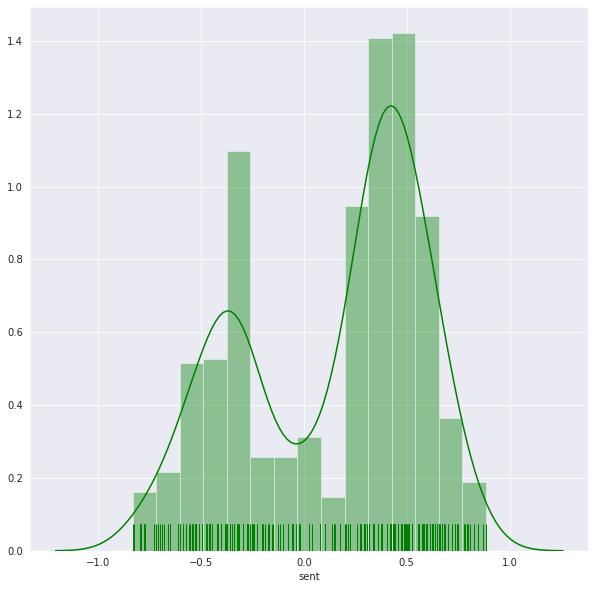

In [25]:
sent_dist(actual_sent)

Sentiment Line Plot


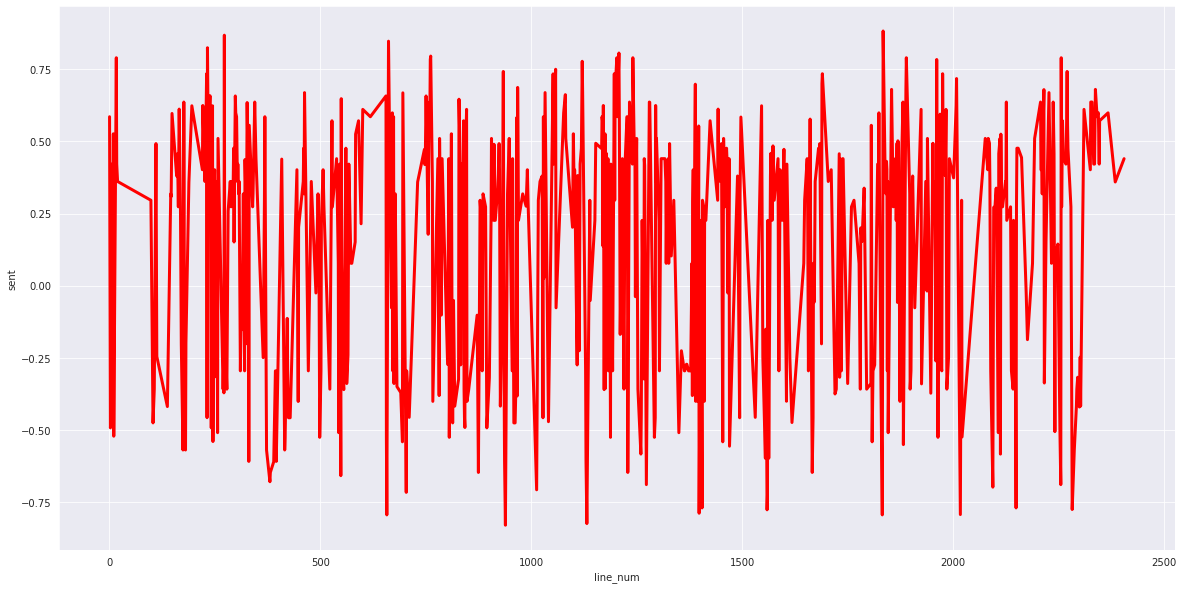

In [27]:
#line graph of sentiment by every line
line_graphs(actual_sent,(20,10))

Sentiment Line Plot


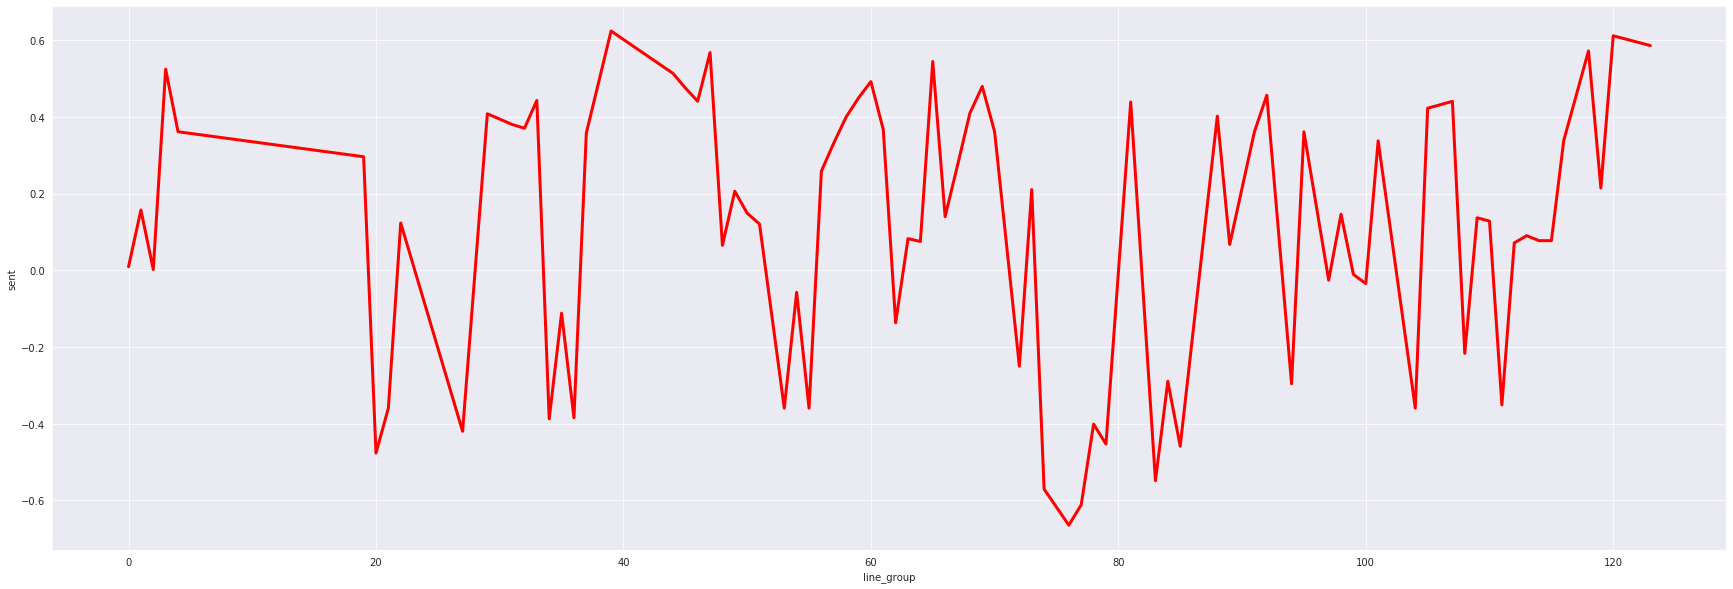

In [29]:
binned_sent_df=bin_sent(actual_sent,line_group_size=5)
line_graphs(binned_sent_df,(30,10))

In [32]:
print('Positive Line','\n',poles(actual_sent,'pos'),'\n''\n','Negative Line','\n',poles(actual_sent,'neg'))

Positive Line 
       line_num                           line    sent
1834      1834  my true love would rescue me.  0.8834 

 Negative Line 
      line_num                           line    sent
939       939  I'm gonna die. I'm gonna die. -0.8316


In [0]:
word=split_and_df(text,'word')
word=word[-word.isin(stopwords)].dropna(how='any')
word.word=word.word.apply(clean)

In [35]:
word=word.dropna(how='any')
word[word.word.str.contains('donkey')].word.value_counts()

donkey     47
donkeys     5
Name: word, dtype: int64